# Cuaderno de entrenamiento de modelo de semaforo inteligente

En este cuaderno se presenta el modelo de enternamiento y fine tunning del modelo. considerando desde el analisis exploratorio de datos. hasta tener un modelo listo y funcional, además de que este se pueda considerar eficiente con respecto al entrenamiento del modelo inicial.

### Analisis Exploratorio de Datos

En este analisis se busca modificar el dataset inicial con la intención de que este sea conveniente para el entrenamiento que buscamos. 

El dataset con el que empezamos es vehicles.v2-release.tensorflow de roboflow.

el link de descarga del dataset se encuentra en [Link de descarga dataset](https://universe.roboflow.com/roboflow-100/vehicles-q0x2v)

Este dataset por defecto cuenta con, 3 carpetas, que constituyen a un grupo de entrenamiento, un grupo de test y validacion. cuyo tercer grupo nos servirá para comprobar el funcionamiento del modelo, sin tomar los mismos ejemplos con los que se entrena y se realizan las pruebas de funcionamiento iniciales.

en total se cuenta con 4058 imagenes marcadas con sus valores por cada una, estos valores corresponden al tipo de vehículo y cantidad por cada imagen. para conocer esta información se utiliza el csv de _annotations que cuenta con un formato en csv tal que.

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,**640**,480,**car**,254,**185**,271,**197**

en donde la primera parte representa el nombre del archivo (imagen), ancho, alto, tipo de vehiculo, posicion en X y Y desde donde empieza el recuadro del vehiculo. dado a que en cada imagen hay o pueden haber uno o varios vehiculos. entonces por cada imagen existe varias de estas lineas de clases. ejemplo la primera imagen de test cuyo valor de anotaciones es el siguiente. en donde se consideran los vehiculos más cercanos a la camara.

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,640,480,car,254,185,271,197

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,640,480,truck-xl-,367,185,421,227

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,640,480,car,337,199,355,215

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,640,480,car,311,204,334,224

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,640,480,truck-l-,434,217,520,304

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,640,480,car,335,262,370,297

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,640,480,car,393,265,437,308

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,640,480,car,168,290,219,335

malam_04112021_mp4-551_jpg.rf.0366ed2bbec91ee56f3609917f35a4bb.jpg,640,480,car,433,375,537,480


lo que significa que cuenta con 9 vehiculos.

siendo esta la imagen

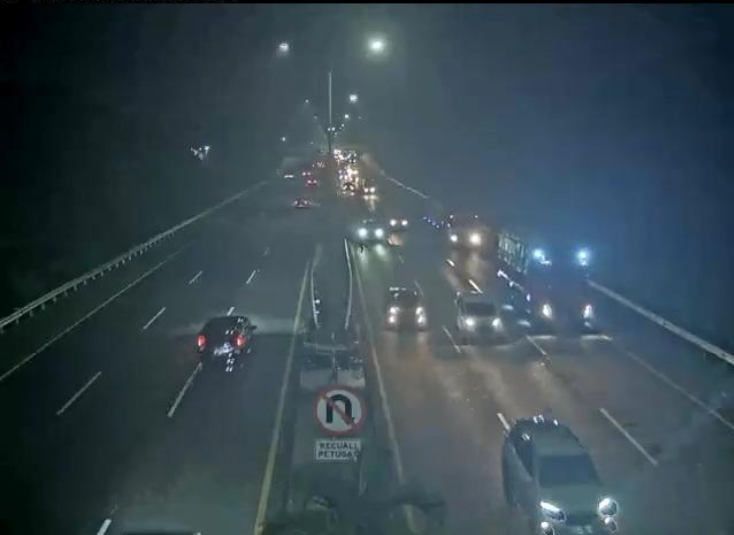

## Carga de datos

Previo a la carga de datos se modifica el dataset, dado que este cuenta con tipos de vehiculos, que no son de importancia en el proyecto, cambiaremos todos los tipos de vehiculo por uno solo de "CAR"
cambiandolo tanto en el archivo .yaml como en los txt de cada uno de los archivos.

ejemplo de esta modificación es:

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,truck-l-,28,226,137,324

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,car,198,276,247,321

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,small truck,415,274,480,355

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,car,487,289,564,356

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,car,0,327,42,373

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,truck-m-,3,295,137,461



cuyos valores cambiaran solo en el apartado de tipo de clase a car:

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,**car**,28,226,137,324

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,**car**,198,276,247,321

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,**car**,415,274,480,355

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,**car**,487,289,564,356

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,**car**,0,327,42,373

pagi_16112021_mp4-68_jpg.rf.0152979251b293d380da762fafbc432d.jpg,640,480,**car**,3,295,137,461


## Entrenamiento

In [16]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available())


SyntaxError: expected 'else' after 'if' expression (2683708125.py, line 4)

In [15]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt') 

model.train(
    data='vehicles.v2-release.yolov8-obb/data.yaml',
    epochs=30,
    imgsz=640,
    batch=8,
    task='segment'
)

Ultralytics 8.3.161  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=vehicles.v2-release.yolov8-obb/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

train: Scanning C:\Users\jorge\Documents\IA_FINAL\vehicles.v2-release.yolov8-obb\train\labels... 2634 images, 98 backgrounds, 0 corrupt: 100%|██████████| 2634/2634 [00:08<00:00, 303.75it/s]


train: New cache created: C:\Users\jorge\Documents\IA_FINAL\vehicles.v2-release.yolov8-obb\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 5.81.9 MB/s, size: 45.2 KB)


val: Scanning C:\Users\jorge\Documents\IA_FINAL\vehicles.v2-release.yolov8-obb\valid\labels... 966 images, 39 backgrounds, 0 corrupt: 100%|██████████| 966/966 [00:02<00:00, 362.32it/s]


val: New cache created: C:\Users\jorge\Documents\IA_FINAL\vehicles.v2-release.yolov8-obb\valid\labels.cache
Plotting labels to runs\segment\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      1.68G      1.506      1.943      1.422      1.104         19        640: 100%|██████████| 330/330 [01:44<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:23<00:00,  2.56it/s]


                   all        966       8537       0.74      0.738      0.755      0.398      0.712      0.698      0.706      0.322

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      1.99G      1.424      1.722     0.9986      1.072         36        640: 100%|██████████| 330/330 [01:27<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:20<00:00,  2.91it/s]


                   all        966       8537      0.783      0.744      0.787      0.415       0.76      0.714      0.744      0.345

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      1.99G      1.401       1.67     0.9178      1.073         23        640: 100%|██████████| 330/330 [01:26<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:24<00:00,  2.53it/s]


                   all        966       8537      0.785      0.745      0.794       0.44      0.766      0.702      0.748      0.364

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.99G      1.378      1.641      0.874      1.064         20        640: 100%|██████████| 330/330 [01:23<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.54it/s]


                   all        966       8537      0.789      0.759      0.802      0.441      0.771      0.729       0.77      0.373

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      1.99G      1.361      1.622     0.8437      1.056         33        640: 100%|██████████| 330/330 [01:11<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:19<00:00,  3.11it/s]


                   all        966       8537      0.798      0.753      0.805      0.454      0.781      0.717      0.771      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.99G      1.348        1.6       0.82      1.052         16        640: 100%|██████████| 330/330 [01:21<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:19<00:00,  3.11it/s]

                   all        966       8537      0.816      0.736      0.803       0.46      0.796      0.701      0.762       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.99G      1.329      1.577     0.8032      1.048         31        640: 100%|██████████| 330/330 [01:19<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:19<00:00,  3.11it/s]


                   all        966       8537        0.8      0.756      0.809       0.46      0.776      0.718      0.758      0.363

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.99G       1.32      1.557     0.7867      1.049         15        640: 100%|██████████| 330/330 [01:20<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:21<00:00,  2.83it/s]

                   all        966       8537      0.785      0.775      0.811      0.466      0.767      0.747      0.782      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.99G      1.309      1.539     0.7741      1.044         35        640: 100%|██████████| 330/330 [01:24<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:20<00:00,  2.93it/s]

                   all        966       8537      0.814      0.738       0.81      0.463      0.787      0.704      0.768      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.99G      1.279      1.518      0.799      1.026          0        640: 100%|██████████| 330/330 [01:24<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:19<00:00,  3.05it/s]

                   all        966       8537      0.822      0.761      0.826      0.479      0.799      0.733      0.794      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.99G      1.295      1.511     0.7439      1.039         16        640: 100%|██████████| 330/330 [01:25<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:20<00:00,  2.92it/s]

                   all        966       8537      0.825      0.736      0.809      0.466      0.797      0.704      0.764      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.99G       1.27      1.503     0.7423      1.026         18        640: 100%|██████████| 330/330 [00:39<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966       8537      0.803      0.726      0.803      0.474      0.786      0.695      0.765       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.99G      1.264      1.487     0.7183      1.022         28        640: 100%|██████████| 330/330 [00:34<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.05it/s]

                   all        966       8537      0.813       0.76      0.811      0.476      0.788      0.725      0.771      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.99G       1.25      1.473     0.7183      1.017          4        640: 100%|██████████| 330/330 [00:35<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.28it/s]

                   all        966       8537      0.812      0.763      0.828      0.482        0.8      0.736      0.799      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.99G      1.245      1.453     0.7088      1.017         28        640: 100%|██████████| 330/330 [00:34<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.20it/s]

                   all        966       8537      0.793      0.731      0.812      0.471      0.774      0.697      0.771      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.99G      1.241       1.44     0.6987      1.013         31        640: 100%|██████████| 330/330 [00:35<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.18it/s]

                   all        966       8537      0.806      0.765       0.83      0.487      0.783      0.734      0.791        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.99G      1.228      1.442     0.6887      1.013         17        640: 100%|██████████| 330/330 [00:35<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.03it/s]

                   all        966       8537      0.818       0.75      0.825      0.501      0.801      0.721      0.794      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.99G      1.224      1.429     0.6826       1.01         34        640: 100%|██████████| 330/330 [00:34<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]

                   all        966       8537       0.83      0.768      0.832      0.494      0.804      0.748      0.803      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.99G      1.221      1.435     0.6753      1.007         23        640: 100%|██████████| 330/330 [00:35<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.09it/s]

                   all        966       8537      0.804      0.754      0.821      0.492      0.785      0.731      0.791      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      1.99G      1.216      1.428     0.6788      1.007         43        640: 100%|██████████| 330/330 [00:40<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.06it/s]

                   all        966       8537      0.826      0.751      0.826      0.498      0.801      0.719      0.783      0.402


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      1.99G      1.206      1.371     0.6456      1.016         26        640: 100%|██████████| 330/330 [00:33<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.17it/s]


                   all        966       8537      0.808      0.759      0.828      0.497      0.785      0.719      0.782      0.396

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      1.99G      1.193      1.357     0.6352      1.008         11        640: 100%|██████████| 330/330 [00:33<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.97it/s]

                   all        966       8537      0.831      0.732      0.822        0.5      0.813      0.699      0.785      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30      1.99G       1.19      1.351     0.6269      1.008         24        640: 100%|██████████| 330/330 [00:33<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.06it/s]

                   all        966       8537      0.812      0.734      0.821      0.502      0.792        0.7      0.782      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      1.99G      1.176      1.335     0.6124      1.004          8        640: 100%|██████████| 330/330 [00:33<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.16it/s]

                   all        966       8537      0.813      0.713      0.801      0.495      0.802       0.68      0.769      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      1.99G      1.171       1.33     0.6087      1.007         17        640: 100%|██████████| 330/330 [00:33<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.09it/s]

                   all        966       8537      0.822      0.756       0.83      0.512        0.8      0.726      0.795      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      1.99G      1.165      1.315     0.5996      1.001         14        640: 100%|██████████| 330/330 [00:33<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.05it/s]

                   all        966       8537      0.817      0.734      0.819      0.505      0.806      0.696      0.784      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      1.99G      1.147      1.296       0.59     0.9921          5        640: 100%|██████████| 330/330 [00:33<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.84it/s]

                   all        966       8537      0.825       0.72      0.811      0.505      0.806      0.689      0.778      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      1.99G      1.138      1.287     0.5771     0.9915         10        640: 100%|██████████| 330/330 [00:33<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.10it/s]

                   all        966       8537      0.828      0.694        0.8      0.499      0.808      0.668      0.764      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      1.99G       1.13      1.279     0.5716     0.9863         22        640: 100%|██████████| 330/330 [00:33<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.11it/s]

                   all        966       8537      0.824      0.714      0.808      0.507      0.814      0.675      0.772      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      1.99G      1.118      1.263     0.5584     0.9803          5        640: 100%|██████████| 330/330 [00:33<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  8.04it/s]

                   all        966       8537      0.821      0.719      0.808      0.508      0.811      0.687      0.774      0.412



30 epochs completed in 0.559 hours.
Optimizer stripped from runs\segment\train2\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train2\weights\best.pt, 6.8MB

Validating runs\segment\train2\weights\best.pt...
Ultralytics 8.3.161  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   2%|▏         | 1/61 [00:00<00:09,  6.54it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   3%|▎         | 2/61 [00:00<00:15,  3.79it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validati

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.72it/s]


                   all        966       8537      0.822      0.756      0.829      0.512      0.801      0.726      0.795      0.429
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\segment\train2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000166321757E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0410

In [ ]:
from ultralytics import YOLO
model = YOLO('best.pt')  # Cargar el modelo preentrenado


image 1/1 c:\Users\jorge\Documents\IA_FINAL\vehicles.v2-release.yolov8-obb\valid\images\pagi_16112021_mp4-272_jpg.rf.78d8fab22f663f703f1acd124fcacb63.jpg: 480x640 12 cars, 24.9ms
Speed: 5.3ms preprocess, 24.9ms inference, 6.1ms postprocess per image at shape (1, 3, 480, 640)


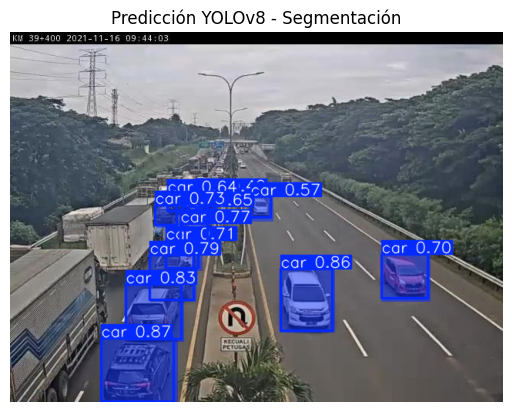

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2

results = model.predict(
    source="vehicles.v2-release.yolov8-obb/valid/images/pagi_16112021_mp4-272_jpg.rf.78d8fab22f663f703f1acd124fcacb63.jpg",
    save=False,
    show=False,
    task="segment"
)

img_with_boxes = results[0].plot()

if isinstance(img_with_boxes, Image.Image):
    img_with_boxes = np.array(img_with_boxes)

if img_with_boxes.shape[-1] == 3:
    img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
else:
    img_rgb = img_with_boxes

output_path = "output.png"
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)) 

img = Image.open(output_path)

plt.imshow(img)
plt.axis('off')
plt.title("Predicción YOLOv8 - Segmentación")
plt.show()

In [ ]:
results = model.predict(
    source="vehicles.v2-release.yolov8-obb/test/images/siang_15112021_1_mp4-66_jpg.rf.cd1a7ffe418b5a92dae09e3a567a561e.jpg",
    save=False,
    show=False,
    task="segment"
)

img_with_boxes = results[0].plot()

if isinstance(img_with_boxes, Image.Image):
    img_with_boxes = np.array(img_with_boxes)

if img_with_boxes.shape[-1] == 3:
    img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
else:
    img_rgb = img_with_boxes

output_path = "output.png"
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)) 

img = Image.open(output_path)

plt.imshow(img)
plt.axis('off')
plt.title("Predicción YOLOv8 - Segmentación")
plt.show()

In [ ]:
results = model.predict(
    source="vehicles.v2-release.yolov8-obb/valid/images/pagi_16112021_mp4-272_jpg.rf.78d8fab22f663f703f1acd124fcacb63.jpg",
    save=False,
    show=False,
    task="segment"
)

img_with_boxes = results[0].plot()

if isinstance(img_with_boxes, Image.Image):
    img_with_boxes = np.array(img_with_boxes)

if img_with_boxes.shape[-1] == 3:
    img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
else:
    img_rgb = img_with_boxes

output_path = "output.png"
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)) 

img = Image.open(output_path)

plt.imshow(img)
plt.axis('off')
plt.title("Predicción YOLOv8 - Segmentación")
plt.show()

In [ ]:
results = model.predict(
    source="vehicles.v2-release.yolov8-obb/valid/images/pagi_16112021_mp4-272_jpg.rf.78d8fab22f663f703f1acd124fcacb63.jpg",
    save=False,
    show=False,
    task="segment"
)

img_with_boxes = results[0].plot()

if isinstance(img_with_boxes, Image.Image):
    img_with_boxes = np.array(img_with_boxes)

if img_with_boxes.shape[-1] == 3:
    img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
else:
    img_rgb = img_with_boxes

output_path = "output.png"
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)) 

img = Image.open(output_path)

plt.imshow(img)
plt.axis('off')
plt.title("Predicción YOLOv8 - Segmentación")
plt.show()